In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

/Users/smcaleese/Documents/masters-thesis-code/.env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Load pre-trained model
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.eval()  # Put the model in evaluation mode

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [57]:
import torch

def calculate_perplexity(sentence: str) -> float:
    tokenize_input = tokenizer.encode(sentence, return_tensors="pt")
    loss = model(tokenize_input, labels=tokenize_input).loss
    num_tokens = tokenize_input.size()[1]
    normalized_loss = loss / num_tokens
    perplexity = torch.exp(loss).item()
    normalized_perplexity = torch.exp(normalized_loss).item()
    # return normalized_perplexity
    return perplexity, normalized_perplexity

def normalize_perplexities(perplexities):
    perplexity_values = [p for _, p in perplexities]
    min_perplexity = min(perplexity_values)
    max_perplexity = max(perplexity_values)
    
    normalized_results = []
    for sentence, perplexity in perplexities:
        if max_perplexity == min_perplexity:
            normalized_score = 0  # All sentences have the same perplexity
        else:
            normalized_score = (perplexity - min_perplexity) / (max_perplexity - min_perplexity)
        # Invert the score so that lower perplexity (better) maps to higher normalized score
        # normalized_score = 1 - normalized_score
        normalized_results.append((sentence, perplexity, normalized_score))
    
    return normalized_results

# sentences = [
#     "The quick",
#     "The quick brown",
#     "The quick brown fox",
#     "The quick brown fox jumps",
#     "The quick brown fox jumps over",
# ]

sentences = [
    "This movie was sadly under-promoted but proved to be truly exceptional. Entering the theatre I knew nothing about the film except that a friend wanted to see it. I was caught off guard with the high quality of the film. I couldn't image Ashton Kutcher in a serious role, but his performance truly exemplified his character. This movie is exceptional and deserves our monetary support, unlike so many other movies. It does not come lightly for me to recommend any movie, but in this case I highly recommend that everyone see it. This films is Truly Exceptional!",
    "On a dark, gloomy New Year's Eve night, an ill nurse, her life slowly ebbing away, demands that David Holm be presented to her at once. We don't yet know who David Holm is, or why this nurse wishes to see him, but her only dying wish is to speak with him just one more time. On the other side of the town, nestled comfortably amongst the gravestones of the local cemetery, Holm (Victor Sjöström, who also directed) and two of his drunken associates merrily await the coming of the New Year. ""Here we can tell just when to drink the New Year in,"" exclaims Holm, casting a finger towards the large clock tower that looms through the darkness. Little does he know, however, that he will not be alive to greet it. To pass the time, Holm cheerfully recites a ghost story. He'd once had a friend name George, ""a merry fellow"" who was ""smarter than the rest of us."" On one New Year's Eve several years ago, George has broken up a potentially disastrous brawl, fearing that the final man to draw his last breath before midnight would be condemned to drive the phantom chariot for the next year, doing Death's bidding and collecting the souls of the deceased. ""And, gentlemen, George died last New Year's Eve!"" concludes Holm happily, not bothering to contain his mocking skepticism of the man's beliefs. As fate has it, of course, an unexpected violent encounter results in Holm's death, just on the stroke of midnight. As the man's transparent spirit rises gingerly from his earthly body, he witnesses, to his horror, the distant approach of a phantom carriage. The driver, a frail cloaked figure - a sickle clasped tightly in his hand - steps down from the carriage and approaches. We are astonished to discover that the driver is none other than a decrepit George, preparing to pass on his ghastly duty to this year's successor. Considering the era in which 'Körkarlen' is made, the special effects in this film are absolutely superb. Cinematographer Julius Jaenzon used double-exposure photography to create the eerie, ghostly silhouette of the carriage and its damned driver. Even today, the end result is highly effective. A particularly impressive scene involves the phantom chariot travelling to the ocean floor to retrieve the soul of a drowned man. Another scene, eerily reminiscent of Jack Torrance (Jack Nicholson) in Stanley Kubrick's 'The Shining,' involves Holm breaking down the kitchen door with an axe in order to reach his fleeing wife and children. Genuinely ominous and unsettling in its execution, Victor Sjöström's 'Körkarlen' is a fine work of cinema, successfully portraying Holm's steady alcoholic decline, his inevitable day of judgment, and a final hopeful possibility of redemption.",
    "Haines is excellent as the brash cadet who thinks West Point will really amount to something now that he has arrived. Haines displays his easy, goofy comic persona as he takes on West Point and Joan Crawford, the local beauty. Great fun for the first half. And amazingly touching after Haines's character goes too far and nearly gets shunned by fellow cadets. The new, humility-filled Haines get s alast-minute reprieve to play in the bill football game against Navy and, despite a broken arm, wins the game. Great, rousing entertainment by MGM in this Haines formula film, shows Billy at his best. William Bakewell also scores as the skinny follower. The handsome-but-goony character would be played by Clark Gable, Cary Grant, Gary Cooper and others in later decades, another take on the beautiful-but-daffy dames played by Carole Lombard and Marion Davies. West Point is a winner!"
]

# perplexity_scores = [(s, calculate_perplexity(s)) for s in sentences]
perplexity_scores = [[s, calculate_perplexity(s)] for s in sentences]
# normalized_perplexity_scores = normalize_perplexities(perplexity_scores)

# for (sentence, perplexity, normalized_score) in normalized_perplexity_scores:
#     print(f"sentence: {sentence}, perplexity: {perplexity}, normalized_score: {normalized_score}")

data = []
for [s, (p, p2)] in perplexity_scores:
    data.append((p, p2))
    print(f"s: {" ".join(s.split()[:5])}, sentence length: {len(s.split())}, perplexity: {p}, normalized perplexity: {p2}")


s: This movie was sadly under-promoted, sentence length: 97, perplexity: 30.56562042236328, normalized perplexity: 1.0301846265792847
s: On a dark, gloomy New, sentence length: 456, perplexity: 32.744083404541016, normalized perplexity: 1.0059105157852173
s: Haines is excellent as the, sentence length: 146, perplexity: 78.64765930175781, normalized perplexity: 1.0217351913452148


In [58]:
data

[(30.56562042236328, 1.0301846265792847),
 (32.744083404541016, 1.0059105157852173),
 (78.64765930175781, 1.0217351913452148)]

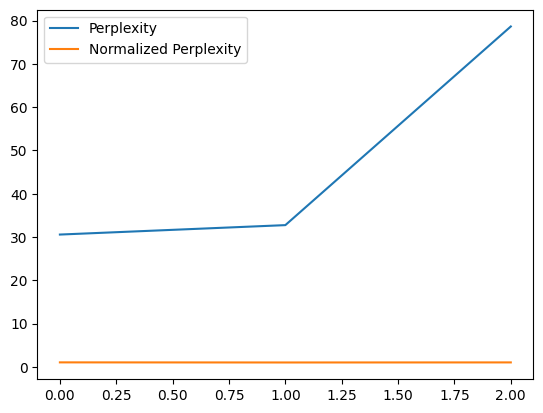

In [59]:
import matplotlib.pyplot as plt

data1 = [p for p, _ in data]
data2 = [p2 for _, p2 in data]

plt.plot(data1, label="Perplexity")
plt.plot(data2, label="Normalized Perplexity")
plt.legend()

In [6]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForMaskedLM.from_pretrained('bert-base-uncased').to(device)

def calculate_perplexity_bert(text):
    encodings = bert_tokenizer(text, return_tensors='pt').to(device)
    print(f"encodings: {encodings}")
    max_length = bert_model.config.max_position_embeddings
    stride = 512
    seq_len = encodings.input_ids.size(1)
    
    nlls = []
    for i in range(0, seq_len, stride):
        begin_loc = max(i + stride - max_length, 0)
        end_loc = min(i + stride, seq_len)
        trg_len = end_loc - i
        input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
        target_ids = input_ids.clone()
        target_ids[:, :-trg_len] = -100
        
        with torch.no_grad():
            outputs = bert_model(input_ids, labels=target_ids)
            neg_log_likelihood = outputs.loss
        
        nlls.append(neg_log_likelihood)
    
    ppl = torch.exp(torch.stack(nlls).mean()).item()
    return ppl

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
# text = "The quick brown fox jumps over the lazy dog."
text = "quick the brow lazy over"
perplexity = calculate_perplexity_bert(text)
print(f"Perplexity: {perplexity}")

encodings: {'input_ids': tensor([[  101,  4248,  1996,  8306, 13971,  2058,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}
Perplexity: 5084.7802734375
